In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
img_path = 'capture.png'
plt.rcParams['figure.figsize'] = [14, 8]

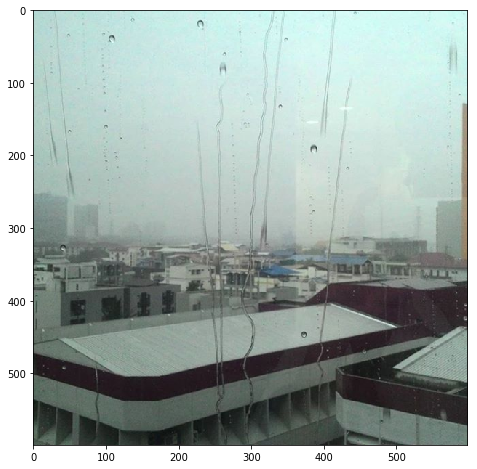

In [11]:
im = cv2.imread(img_path)
plt.imshow(im[:,:,::-1])
plt.show()

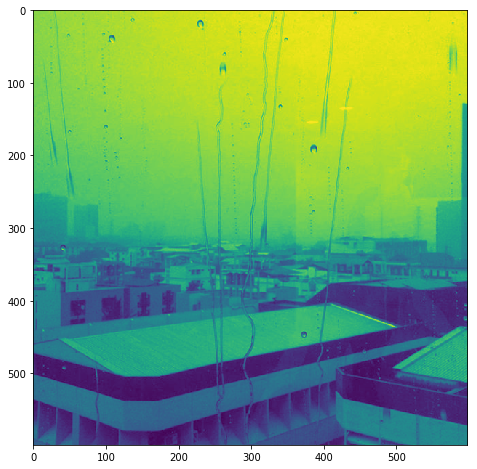

In [5]:
img_gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray)
plt.show()

In [6]:
im_arr = []
for x in range(im.shape[0]):
    for y in range(im.shape[1]):
        im_arr.append(im.data[x, y, 0])

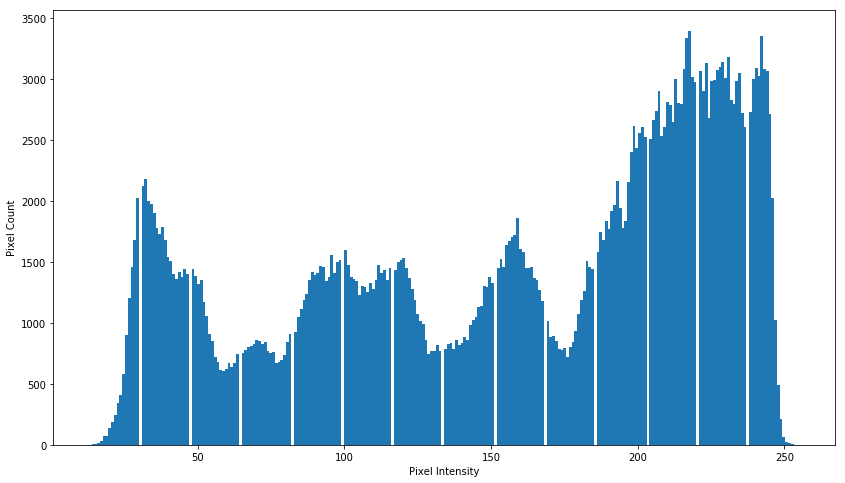

In [7]:
n = plt.hist(im_arr, 256)
plt.xlabel('Pixel Intensity')
plt.ylabel('Pixel Count')
plt.show()

In [8]:
w0 = 0
sum0 = 0
sum1 = np.dot(np.asmatrix(n[0]), np.matrix(np.arange(n[0].size)).T).item(0)
maximum = 0
total = n[0].sum()
val_list = []
for i in range(n[0].size):
    w1 = total  - w0
    if w0 > 0 and w1 > 0:
        m1 = (sum1 - sum0) / w1
        val = w0 * w1 * ((sum0 / w0) - m1)**2
        val_list.append(val)
        if val > maximum:
            level = i
            maximum = val
    w0 += n[0][i]
    sum0 += i * n[0][i]
print(level)
print(maximum)

137
533185246499633.5


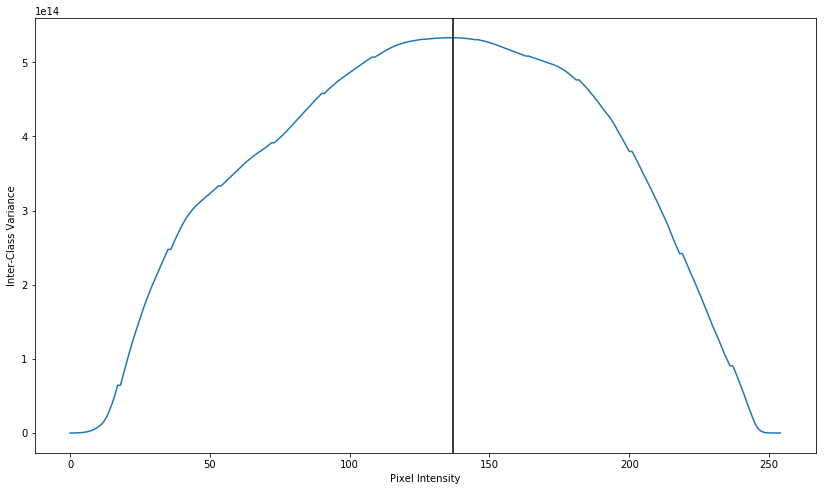

In [9]:
plt.plot(val_list)
plt.axvline(level, color='black')
plt.xlabel('Pixel Intensity')
plt.ylabel('Inter-Class Variance')
plt.show()

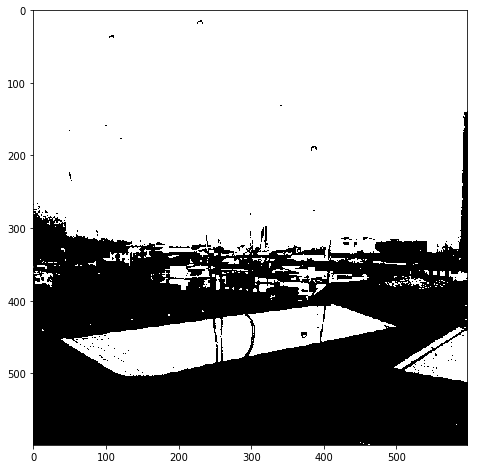

In [10]:
for x in range(im.shape[0]):
    for y in range(im.shape[1]):
        if im.data[x,y,0] > level:
            im[x][y] = [255, 255, 255]
        else:
            im[x][y] = [0, 0, 0]
plt.imshow(im)
plt.show()

In [225]:
cv2.imwrite('otsu.png',im)

True